**This notebook is an exercise in the [Introduction to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/dansbecker/underfitting-and-overfitting).**

---


## Recap
You've built your first model, and now it's time to optimize the size of the tree to make better predictions. Run this cell to set up your coding environment where the previous step left off.

In [1]:
# Code you have previously used to load data
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


# Path of the file to read
iowa_file_path = '../input/home-data-for-ml-course/train.csv'

home_data = pd.read_csv(iowa_file_path)
# Create target object and call it y
y = home_data.SalePrice
# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Specify Model
iowa_model = DecisionTreeRegressor(random_state=1)
# Fit Model
iowa_model.fit(train_X, train_y)

# Make validation predictions and calculate mean absolute error
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE: {:,.0f}".format(val_mae))

'''
{:,.0f}是一个格式化字符串，具体含义如下：

{}是用来插入变量的占位符。
:表示格式化选项的开始。
,表示用逗号作为千位数分隔符。(需要放在1f前面)
.表示小数点的位置（这里是0，表示不显示小数位）。
1f则表示保留1位小数
f表示浮点数的格式。

Validation MAE: 123,457

'''


# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex5 import *
print("\nSetup complete")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Validation MAE: 29,653

Setup complete


# Exercises
You could write the function `get_mae` yourself. For now, we'll supply it. This is the same function you read about in the previous lesson. Just run the cell below.

In [3]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

## Step 1: Compare Different Tree Sizes
Write a loop that tries the following values for *max_leaf_nodes* from a set of possible values.

Call the *get_mae* function on each value of max_leaf_nodes. Store the output in some way that allows you to select the value of `max_leaf_nodes` that gives the most accurate model on your data.

In [17]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
best_mae = float('inf') # 初始化最小的MAE为正无穷
for max_leaf_nodes in candidate_max_leaf_nodes:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print ("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))
    if my_mae < best_mae:
        best_mae = my_mae
        best_tree_size = max_leaf_nodes
# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
# best_tree_size = 100

# Check your answer
step_1.check()

Max leaf nodes: 5  		 Mean Absolute Error:  35044
Max leaf nodes: 25  		 Mean Absolute Error:  29016
Max leaf nodes: 50  		 Mean Absolute Error:  27405
Max leaf nodes: 100  		 Mean Absolute Error:  27282
Max leaf nodes: 250  		 Mean Absolute Error:  27893
Max leaf nodes: 500  		 Mean Absolute Error:  29454


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [ ]:
# The lines below will show you a hint or the solution.
# step_1.hint() 
# step_1.solution()

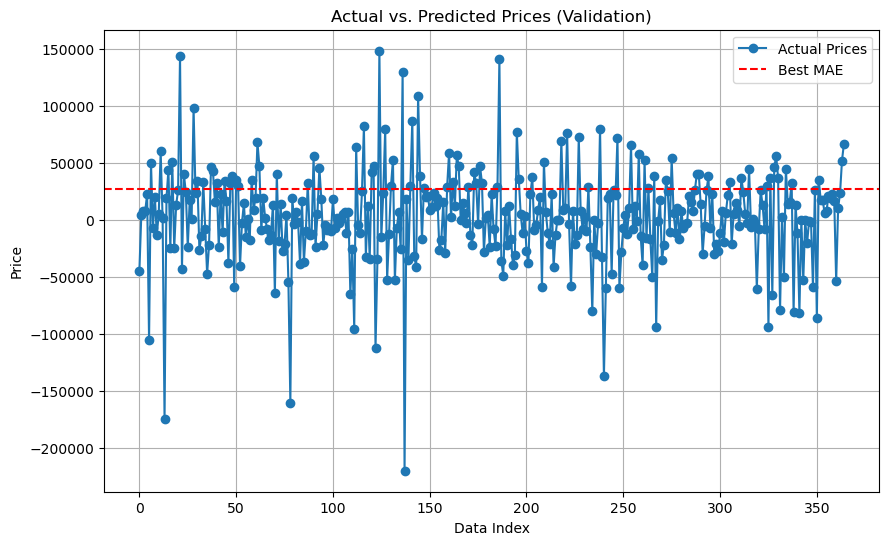

In [10]:
import matplotlib.pyplot as plt

# 计算最佳树的MAE
best_mae = get_mae(best_tree_size, train_X, val_X, train_y, val_y)

# 绘制验证集实际标签和预测结果的图形
plt.figure(figsize=(10, 6))
# plt.scatter(range(len(val_y)), val_y, label='Actual Prices', marker='o', s=30)
# plt.scatter(range(len(val_predictions)), val_predictions, label='Predicted Prices', marker='x', s=30)

# plt.plot(range(len(val_y)), val_y, label='Actual Prices', marker='o')
# plt.plot(range(len(val_predictions)), val_predictions, label='Predicted Prices', marker='x')

plt.plot(range(len(val_y)), val_predictions - val_y, label='Actual Prices', marker='o')

plt.axhline(y=best_mae, color='r', linestyle='--', label='Best MAE')
plt.xlabel('Data Index')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices (Validation)')
plt.legend()
plt.grid(True)
plt.show()


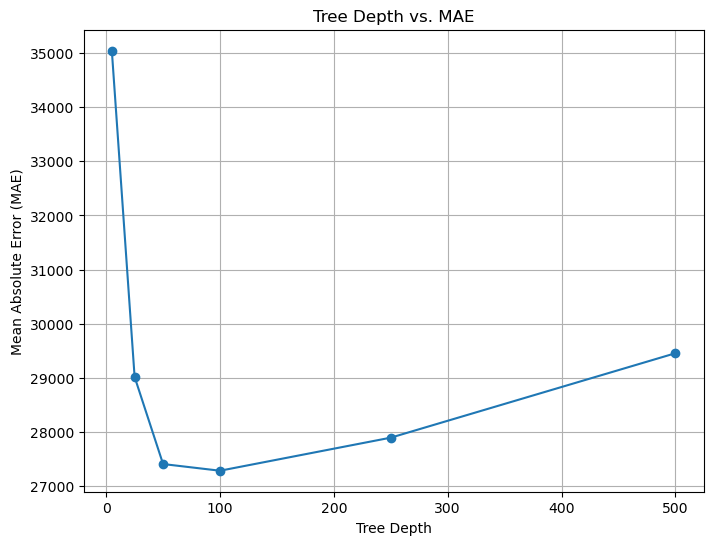

In [12]:
import matplotlib.pyplot as plt

candidate_max_depths = [5, 25, 50, 100, 250, 500]
mae_list = []  # 存储不同树深度对应的MAE值

for max_depth in candidate_max_depths:
    # 在此处计算MAE（假设有一个get_mae函数来计算MAE）
    my_mae = get_mae(max_depth, train_X, val_X, train_y, val_y)
    mae_list.append(my_mae)

# 绘制树深度与MAE的折线图
plt.figure(figsize=(8, 6))
plt.plot(candidate_max_depths, mae_list, marker='o', linestyle='-')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Tree Depth vs. MAE')
plt.grid(True)
plt.show()

当你想可视化树的深度和MAE之间的关系时，你可以使用平滑曲线（Smooth curve）来更加直观地显示趋势。为了实现平滑曲线，你可以使用插值方法，如样条插值或多项式插值。在Python中，你可以使用scipy.interpolate模块来实现插值。

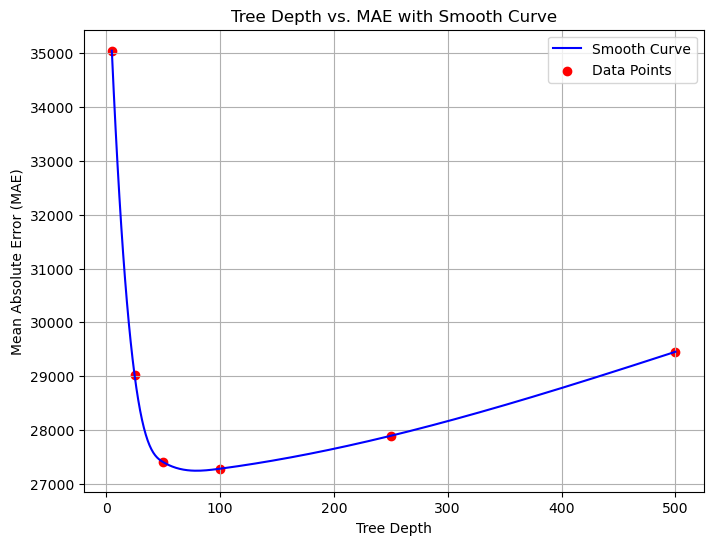

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

candidate_max_depths = [5, 25, 50, 100, 250, 500]
mae_list = []  # 存储不同树深度对应的MAE值

for max_depth in candidate_max_depths:
    # 在此处计算MAE（假设有一个get_mae函数来计算MAE）
    my_mae = get_mae(max_depth, train_X, val_X, train_y, val_y)
    mae_list.append(my_mae)

# 使用样条插值来获得平滑曲线
x_new = np.linspace(min(candidate_max_depths), max(candidate_max_depths), 300)
spl = make_interp_spline(candidate_max_depths, mae_list, k=3)
y_smooth = spl(x_new)

# 绘制平滑曲线
plt.figure(figsize=(8, 6))
plt.plot(x_new, y_smooth, label='Smooth Curve', color='blue')
plt.scatter(candidate_max_depths, mae_list, marker='o', color='red', label='Data Points')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Tree Depth vs. MAE with Smooth Curve')
plt.legend()
plt.grid(True)
plt.show()


## Step 2: Fit Model Using All Data
You know the best tree size. If you were going to deploy this model in practice, you would make it even more accurate by using all of the data and keeping that tree size.  That is, you don't need to hold out the validation data now that you've made all your modeling decisions.

步骤 2：使用所有数据拟合模型
您已经知道了树的最佳大小。如果您要在实践中部署这个模型，您可以通过使用所有数据并保持树的大小来使其更加准确。也就是说，既然您已经做出了所有建模决策，就不需要再保留验证数据了。

In [19]:
# Fill in argument to make optimal size and uncomment
final_model = DecisionTreeRegressor(max_leaf_nodes= best_tree_size,random_state = 1)

# fit the final model and uncomment the next two lines
final_model.fit(X,y)

# Check your answer
step_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [15]:
step_2.hint()
step_2.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Fit with the ideal value of max_leaf_nodes. In the fit step, use all of the data in the dataset

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
# Fit the model with best_tree_size. Fill in argument to make optimal size
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=1)

# fit the final model
final_model.fit(X, y)
```

You've tuned this model and improved your results. But we are still using Decision Tree models, which are not very sophisticated by modern machine learning standards. In the next step you will learn to use Random Forests to improve your models even more.

# Keep Going

You are ready for **[Random Forests](https://www.kaggle.com/dansbecker/random-forests).**


---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/intro-to-machine-learning/discussion) to chat with other learners.*